<a href="https://colab.research.google.com/github/Jion-25/Prediction-of-the-Purchasing-Intention-of-Online-Shoppers/blob/main/AIMS_LAB_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Step 1: Load the dataset
df = pd.read_excel('/content/test-dataset.xlsx')

In [ ]:
df.head()

,Unnamed: 0,household_id,total_income,union_name,user_id,profile_name,father_name,mother_name,birthday,age,...,RESULT_STAT_BMI,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC
0,1,241175,Lower class,KOLA,988794,মো: সাগরহোসেন,0.0,0.0,2001-11-05 18:00:00,19,...,NaN,NaN,NaN,NaN,96.0,Normal,97.0,Normal,NaN,NaN
1,2,241176,Lower class,KOLA,988796,মোছা:তামান্না,0.0,0.0,2000-06-18 18:00:00,20,...,NaN,NaN,NaN,NaN,89.0,Normal,NaN,NaN,NaN,NaN
2,3,241179,Lower class,KOLA,988802,শুকুরুচন্দ্র,0.0,0.0,1978-06-04 18:00:00,42,...,NaN,NaN,NaN,NaN,69.0,Normal,NaN,NaN,NaN,NaN
3,4,241180,Lower class,KOLA,988807,দিপালীরাণী,0.0,0.0,1956-02-02 18:00:00,64,...,NaN,8.72,Random,Normal,85.0,Normal,NaN,NaN,NaN,NaN
4,5,241181,Lower class,KOLA,988809,বুলবুলি,0.0,0.0,1996-12-25 18:00:00,23,...,NaN,NaN,NaN,NaN,101.0,High,NaN,NaN,NaN,NaN


In [ ]:
# Basic statistics
print("\n1. Dataset Overview:")
print(f"   Total records: {len(df)}")
print(f"   Total features: {len(df.columns)}")

# Demographic distribution
print("\n2. Demographic Distribution:")
print(f"   Gender distribution:")
gender_counts = df['gender'].value_counts()
for gender, count in gender_counts.items():
  print(f"  {gender}: {count} ({count/len(df)*100:.1f}%)")

print(f"\n   Age statistics:")
print(f"  Mean: {df['age'].mean():.2f} years")
print(f"  Std Dev: {df['age'].std():.2f} years")
print(f"  Min: {df['age'].min():.0f} years")
print(f"  Max: {df['age'].max():.0f} years")

# Income distribution
print(f"\n   Income class distribution:")
income_counts = df['total_income'].value_counts()
for income, count in income_counts.items():
  print(f"  {income}: {count} ({count/len(df)*100:.1f}%)")

# Medical conditions prevalence
print("\n3. Medical Conditions Prevalence:")
conditions = ['diabetic', 'profile_hypertensive', 'has_cardiovascular_disease', 'had_stroke']
for condition in conditions:
  if condition in df.columns:
    prevalence = df[condition].sum() / len(df) * 100
    print(f"   {condition}: {df[condition].sum()} ({prevalence:.2f}%)")

# Vital signs statistics
print("\n4. Vital Signs Statistics:")
vital_signs = ['SYSTOLIC', 'DIASTOLIC', 'PULSE_RATE', 'SPO2']
for sign in vital_signs:
  if sign in df.columns:
    print(f"  {sign}:")
    print(f"  Mean: {df[sign].mean():.2f}")
    print(f"  Std Dev: {df[sign].std():.2f}")
    print(f"  Min: {df[sign].min():.0f}")
    print(f"  Max: {df[sign].max():.0f}")


1. Dataset Overview:
   Total records: 29999
   Total features: 34

2. Demographic Distribution:
   Gender distribution:
  Female: 23236 (77.5%)
  Male: 6763 (22.5%)

   Age statistics:
  Mean: 38.64 years
  Std Dev: 17.49 years
  Min: 0 years
  Max: 120 years

   Income class distribution:
  Lower class: 19975 (66.6%)
  Middle class: 6262 (20.9%)
  Lower-middle class: 3052 (10.2%)
  Upper class: 710 (2.4%)

3. Medical Conditions Prevalence:
   diabetic: 601 (2.00%)
   profile_hypertensive: 1575 (5.25%)
   has_cardiovascular_disease: 34 (0.11%)
   had_stroke: 23 (0.08%)

4. Vital Signs Statistics:
  SYSTOLIC:
  Mean: 122.16
  Std Dev: 20.86
  Min: 52
  Max: 227
  DIASTOLIC:
  Mean: 76.13
  Std Dev: 12.28
  Min: 30
  Max: 144
  PULSE_RATE:
  Mean: 83.64
  Std Dev: 12.68
  Min: 1
  Max: 206
  SPO2:
  Mean: 97.63
  Std Dev: 4.03
  Min: 5
  Max: 100


In [ ]:
# Step 3: Preprocessing

# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Drop specified columns
columns_to_drop = ['Unnamed: 0','birthday', 'father_name', 'mother_name', 'household_id', 'user_id', 'profile_name', 'HEIGHT', 'WEIGHT', 'BMI', 'RESULT_STAT_BMI', 'SUGAR', 'TAG_NAME', 'RESULT_STAT_SUGAR', 'SPO2','RESULT_STAT_SPO2', 'MUAC', 'RESULT_STAT_MUAC' ]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Drop columns with <10,000 non-null values
threshold = 10000
columns_to_keep = df.columns[df.notnull().sum() >= threshold]
df = df[columns_to_keep].copy() # Use .copy() to avoid SettingWithCopyWarning

print(f"Columns after dropping sparse columns: {list(df.columns)}")


Missing values before handling:
Unnamed: 0                        0
household_id                      0
total_income                      0
union_name                        0
user_id                           0
profile_name                      0
father_name                    4438
mother_name                    4452
birthday                          0
age                               0
gender                            0
is_poor                           0
is_freedom_fighter                0
had_stroke                        0
has_cardiovascular_disease        0
disabilities_name                 0
diabetic                          0
profile_hypertensive              0
SYSTOLIC                       2399
DIASTOLIC                      2399
RESULT_STAT_BP                 2399
HEIGHT                        28871
WEIGHT                        28871
BMI                           28871
RESULT_STAT_BMI               28871
SUGAR                         28416
TAG_NAME                      2

In [ ]:
# Step 4: Handle Missing Values

# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Impute numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

# Impute categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
     if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
total_income                     0
union_name                       0
age                              0
gender                           0
is_poor                          0
is_freedom_fighter               0
had_stroke                       0
has_cardiovascular_disease       0
disabilities_name                0
diabetic                         0
profile_hypertensive             0
SYSTOLIC                      2399
DIASTOLIC                     2399
RESULT_STAT_BP                2399
PULSE_RATE                    2544
RESULT_STAT_PR                2544
dtype: int64

Missing values after handling:
total_income                  0
union_name                    0
age                           0
gender                        0
is_poor                       0
is_freedom_fighter            0
had_stroke                    0
has_cardiovascular_disease    0
disabilities_name             0
diabetic                      0
profile_hypertensive          0
SYSTOLIC  

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


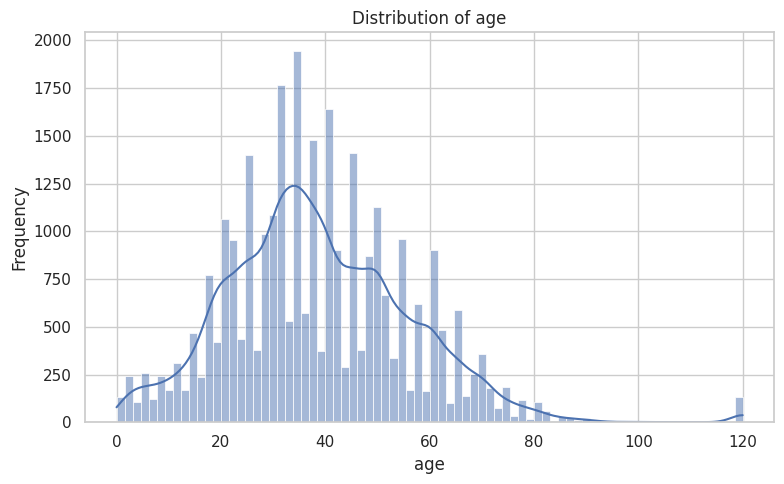

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


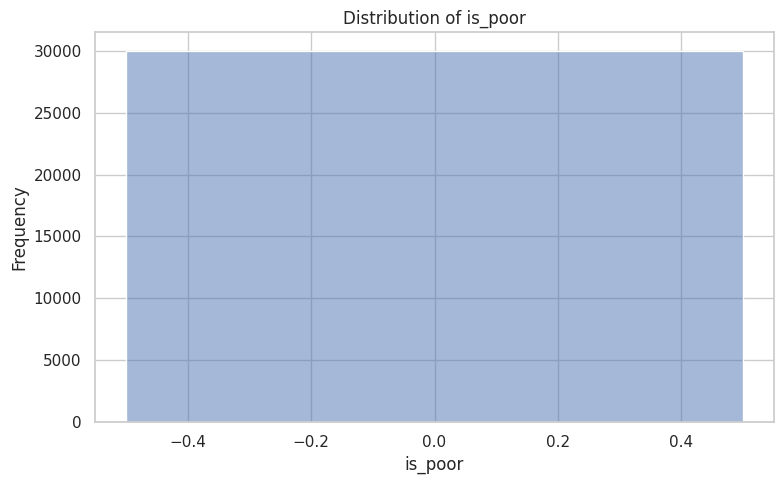

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


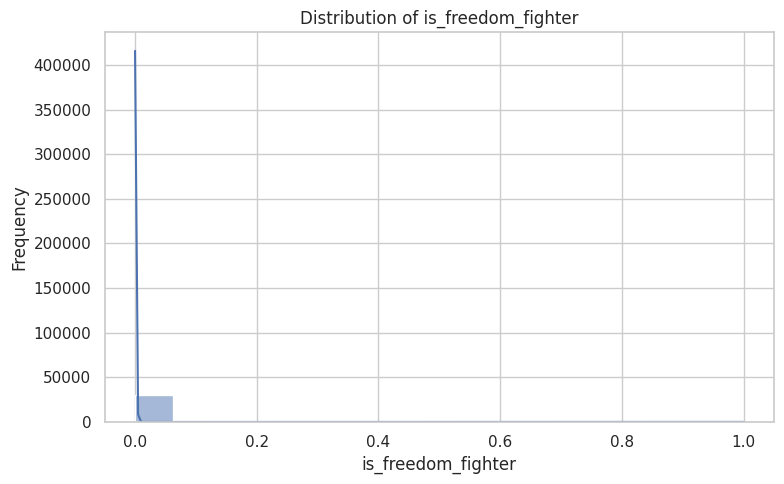

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


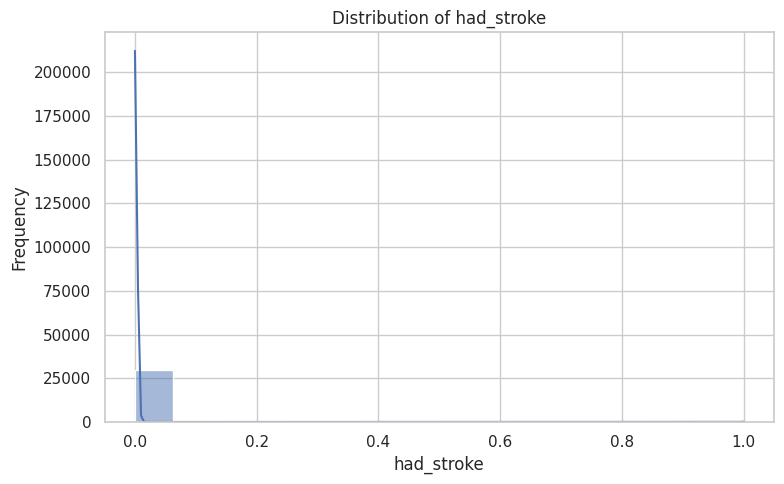

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


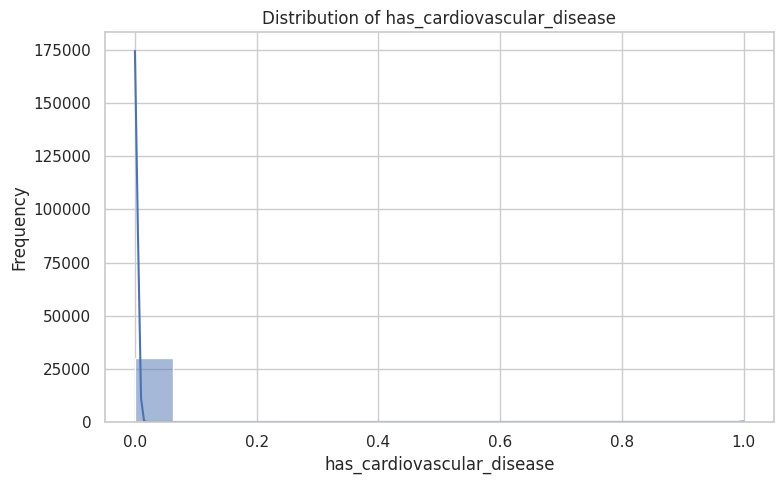

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


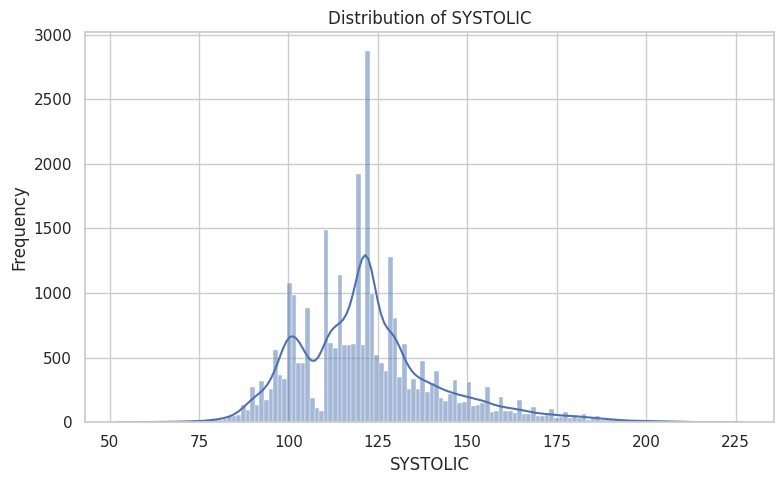

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


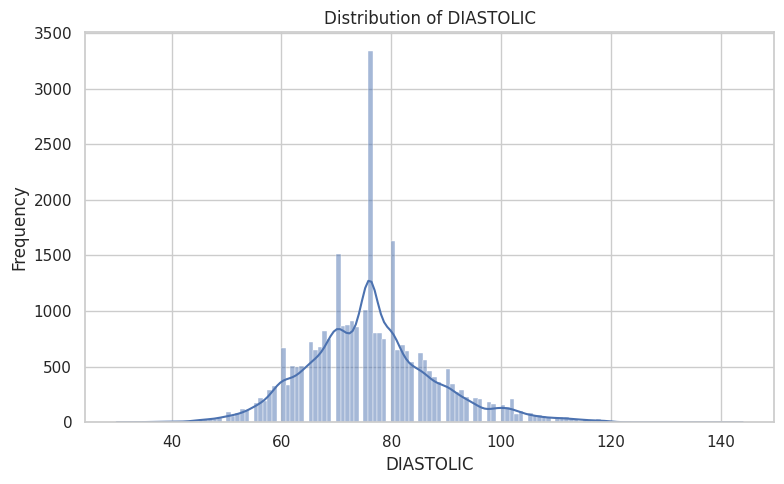

/tmp/ipython-input-2563048321.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None


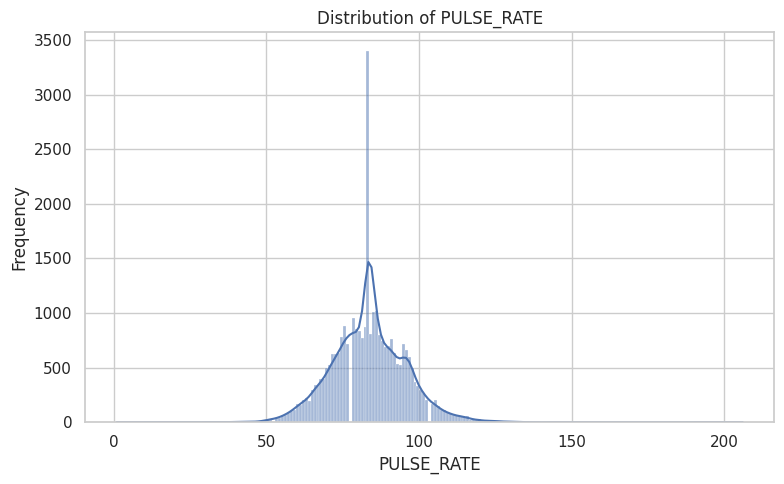

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


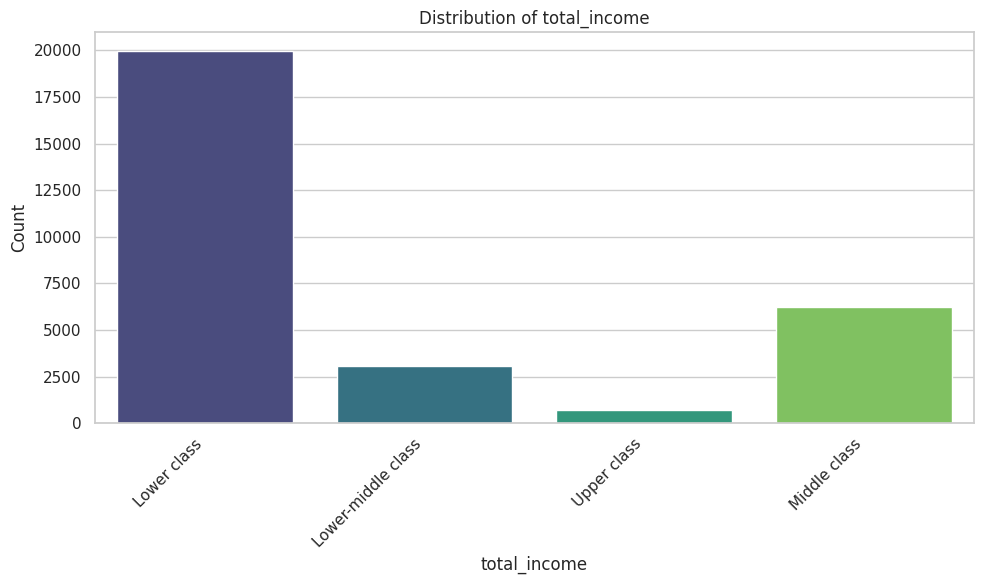

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


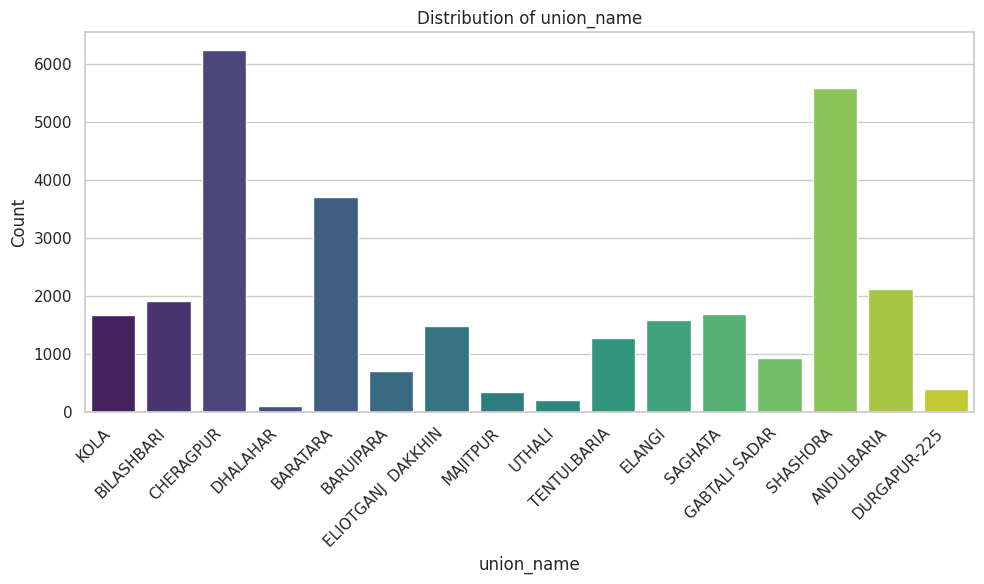

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


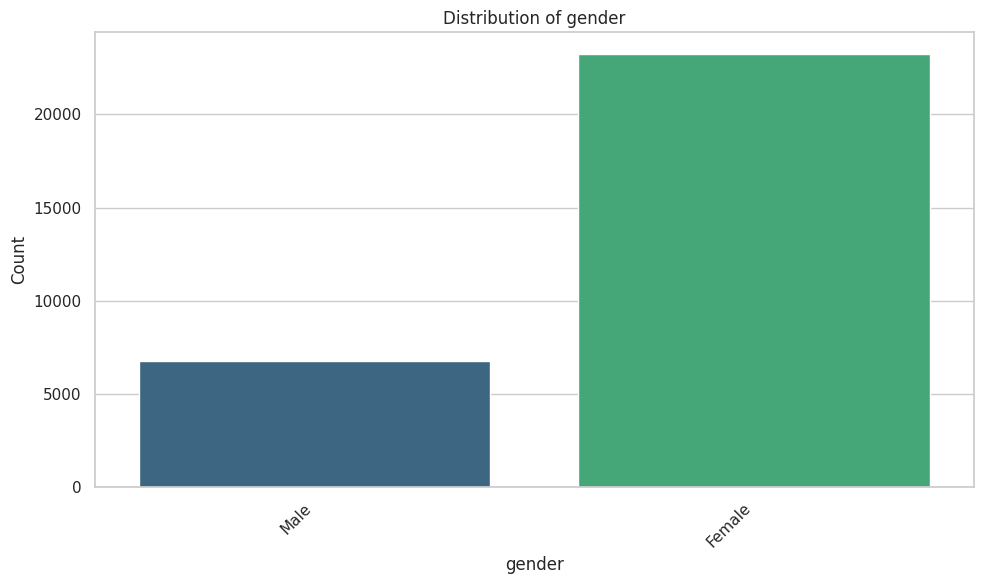

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


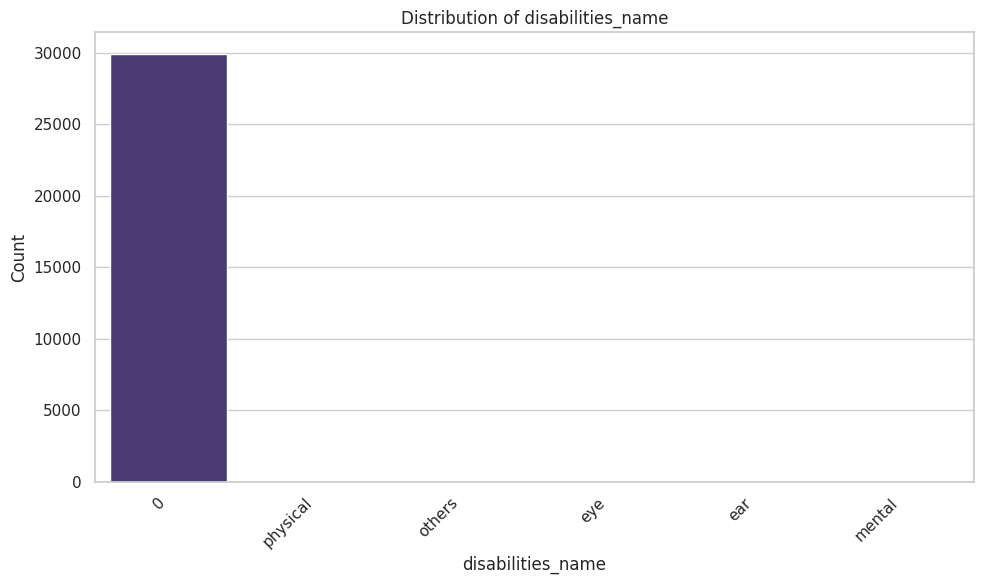

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


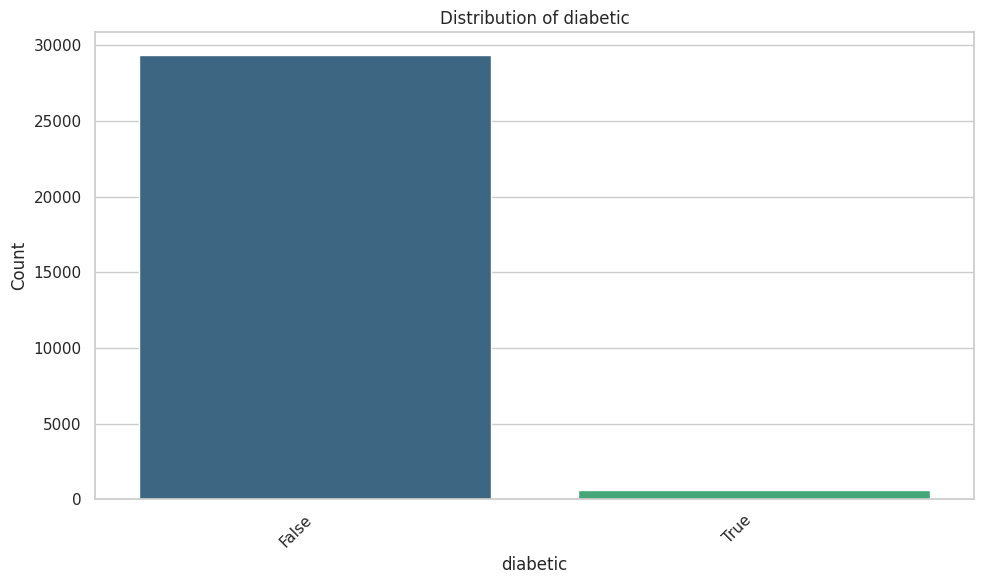

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


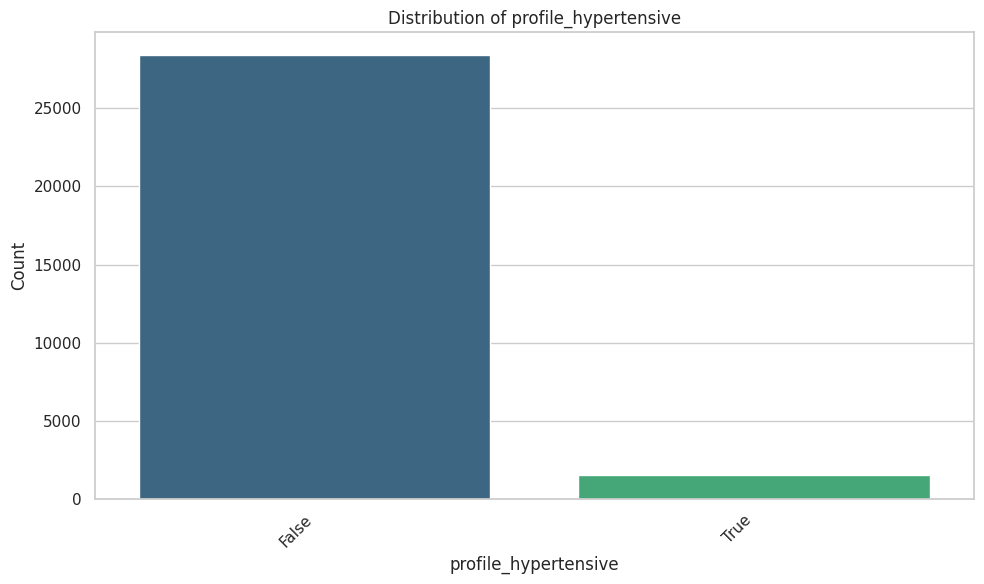

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


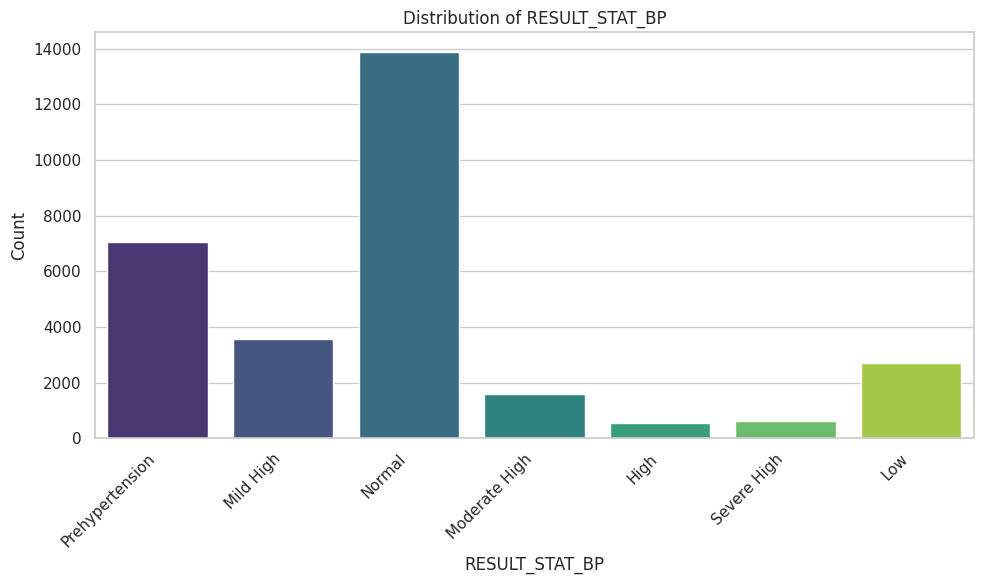

/tmp/ipython-input-2563048321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None


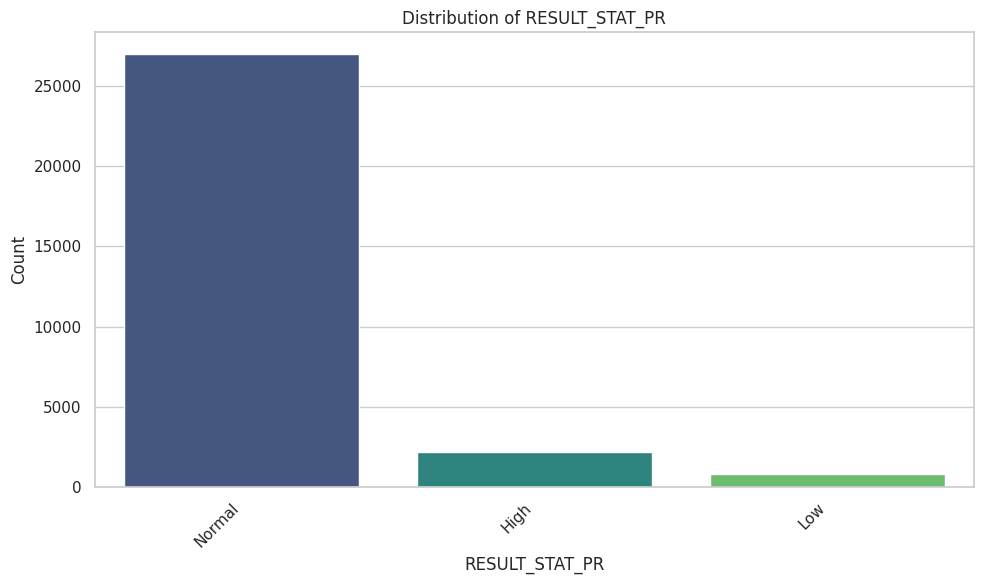

In [ ]:
#  Visualize Distribution of Individual Features

# Visualize distribution of numerical features (Histograms)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=None) # Explicitly set hue to None
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Visualize distribution of categorical features (Count Plots)
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis', hue=None) # Explicitly set hue to None
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Identify categorical columns again after handling missing values
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# 'RESULT_STAT_BP' is the target and  object
if 'RESULT_STAT_BP' in categorical_cols:
    categorical_cols = categorical_cols.drop('RESULT_STAT_BP', errors='ignore')

print("\nCategorical columns for Chi-square tests:")
print("=" * 50)
print(categorical_cols)


Categorical columns for Chi-square tests:
Index(['total_income', 'union_name', 'gender', 'disabilities_name', 'diabetic',
       'profile_hypertensive', 'RESULT_STAT_PR'],
      dtype='object')


In [ ]:
# Step 5: Chi-square tests
results = []
for feature in categorical_cols:
    # Create contingency table, dropping missing values
    valid_data = df[[feature, 'RESULT_STAT_BP']].dropna()
    if valid_data.empty:
        continue
    contingency_table = pd.crosstab(valid_data[feature], valid_data['RESULT_STAT_BP'])

    # Perform Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Format p-value
    if p < 0.0001:
        p_display = '< 0.0001'
    else:
        p_display = f'{p:.6f}'

    # Check assumption (expected frequencies >= 5)
    expected_min = expected.min()
    assumption_met = expected_min >= 5

    # Store results
    results.append({
        'Feature': feature,
        'Chi2_Statistic': chi2,
        'P_Value': p,
        'P_Display': p_display,
        'Degrees_of_Freedom': dof,
        'Assumption_Met': assumption_met,
        'Contingency_Table': contingency_table
    })

In [ ]:
# Step 6: Display Chi-square results
print("\nChi-square Test Results for RESULT_STAT_BP:")
print("=" * 50)
for result in results:
    print(f"\nFeature: {result['Feature']}")
    print(f"Chi-square Statistic: {result['Chi2_Statistic']:.4f}")
    print(f"P-value: {result['P_Display']}")
    print(f"Degrees of Freedom: {result['Degrees_of_Freedom']}")
    print(f"Assumption Met (Expected Freq >= 5): {result['Assumption_Met']}")
    if result['P_Value'] < 0.05:
        print("Conclusion: Significant association (p < 0.05)")
        print("\nContingency Table:")
        print(result['Contingency_Table'])
    else:
        print("Conclusion: No significant association (p >= 0.05)")
    print("-" * 50)


Chi-square Test Results for RESULT_STAT_BP:

Feature: total_income
Chi-square Statistic: 239.0086
P-value: < 0.0001
Degrees of Freedom: 18
Assumption Met (Expected Freq >= 5): True
Conclusion: Significant association (p < 0.05)

Contingency Table:
RESULT_STAT_BP      High   Low  Mild High  Moderate High  Normal  \
total_income                                                       
Lower class          364  1826       2261           1003    9767   
Lower-middle class    48   261        371            151    1365   
Middle class         114   560        833            388    2491   
Upper class           19    57        109             56     266   

RESULT_STAT_BP      Prehypertension  Severe High  
total_income                                      
Lower class                    4362          392  
Lower-middle class              802           54  
Middle class                   1707          169  
Upper class                     188           15  
------------------------------------


Generating visualizations for significant features...


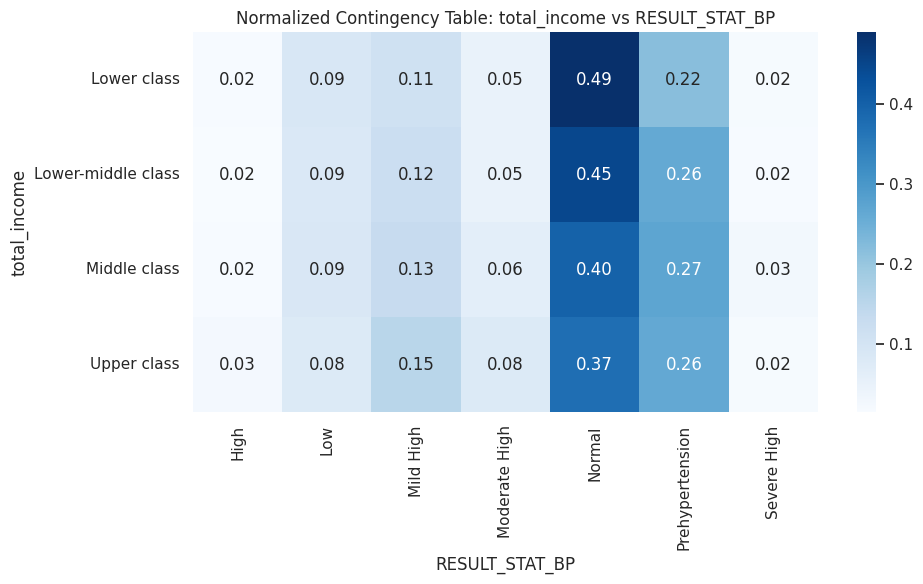

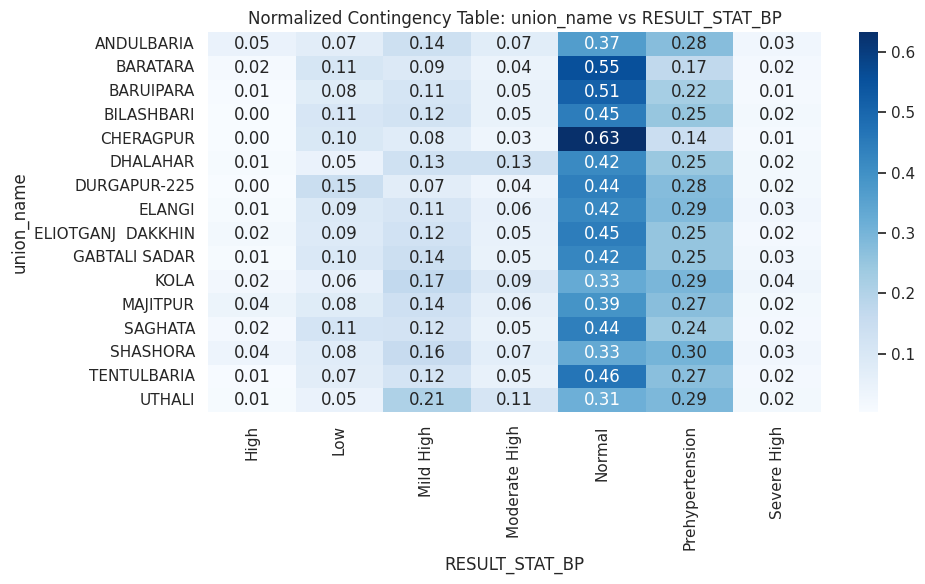

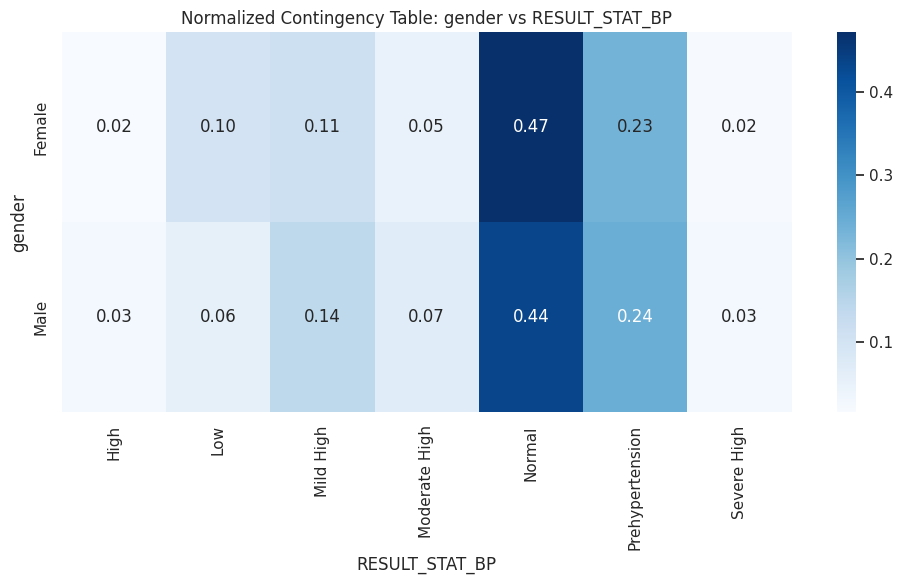

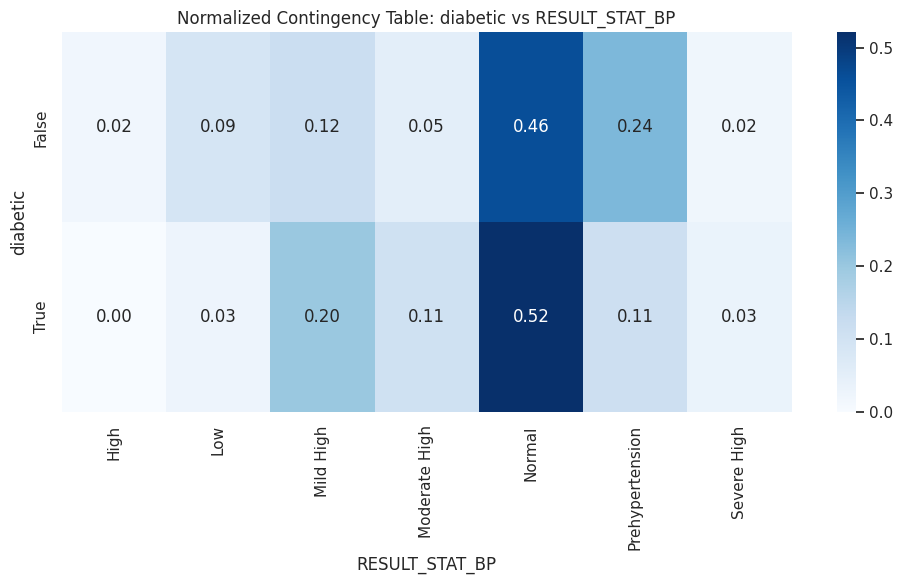

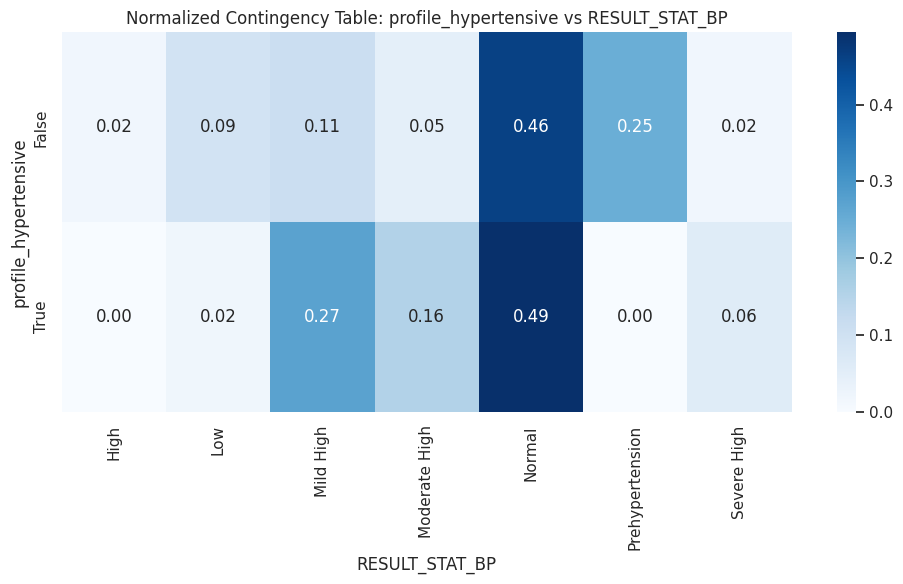

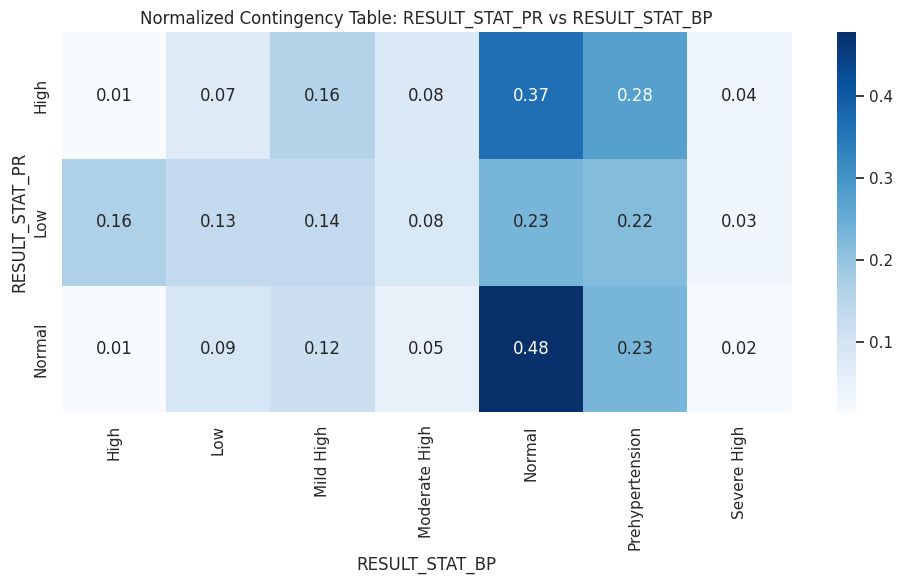

In [ ]:
# Step 7: Visualizations for significant features
print("\nGenerating visualizations for significant features...")
for result in results:
    if result['P_Value'] < 0.05:
        feature = result['Feature']
        contingency_table = result['Contingency_Table']

        # Normalize contingency table by row (proportions)
        normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

        # Plot heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(normalized_table, annot=True, cmap='Blues', fmt='.2f')
        plt.title(f'Normalized Contingency Table: {feature} vs RESULT_STAT_BP')
        plt.xlabel('RESULT_STAT_BP')
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()


Generating bar plots for significant features...


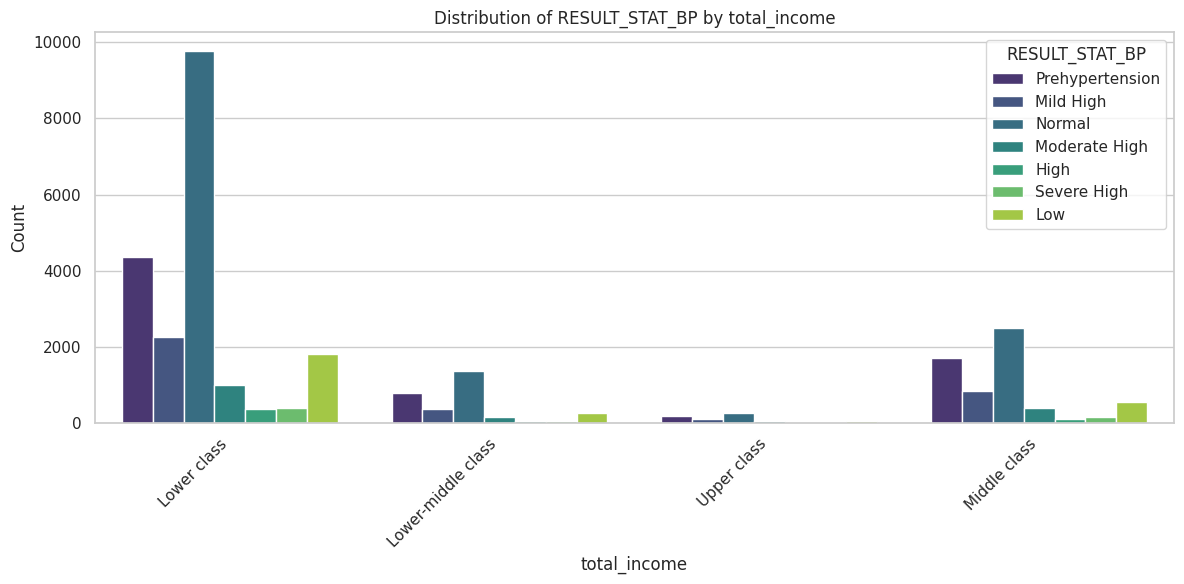

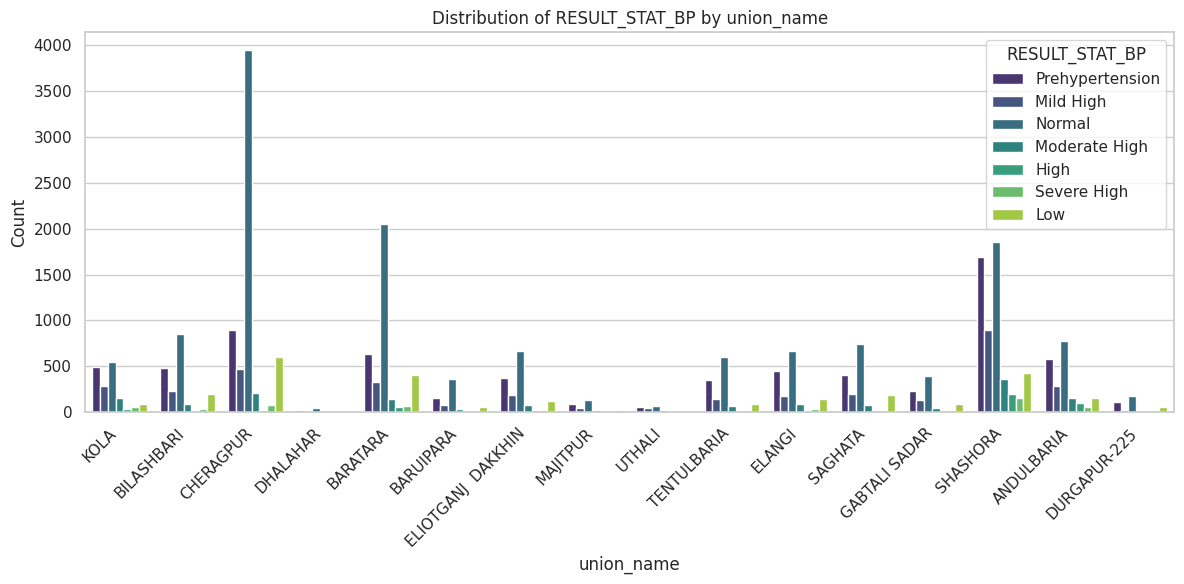

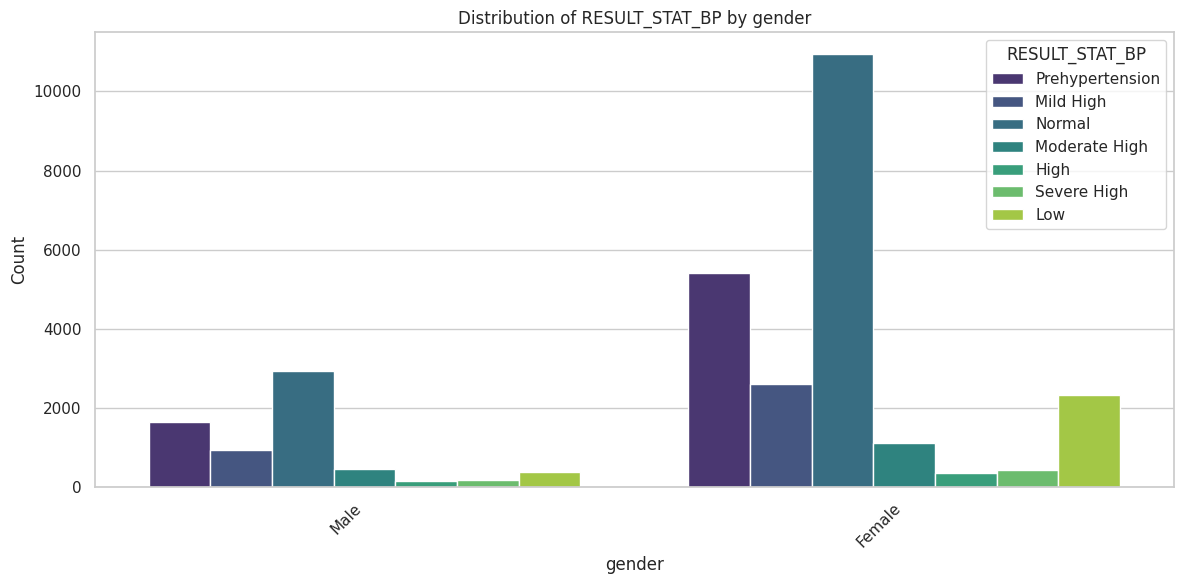

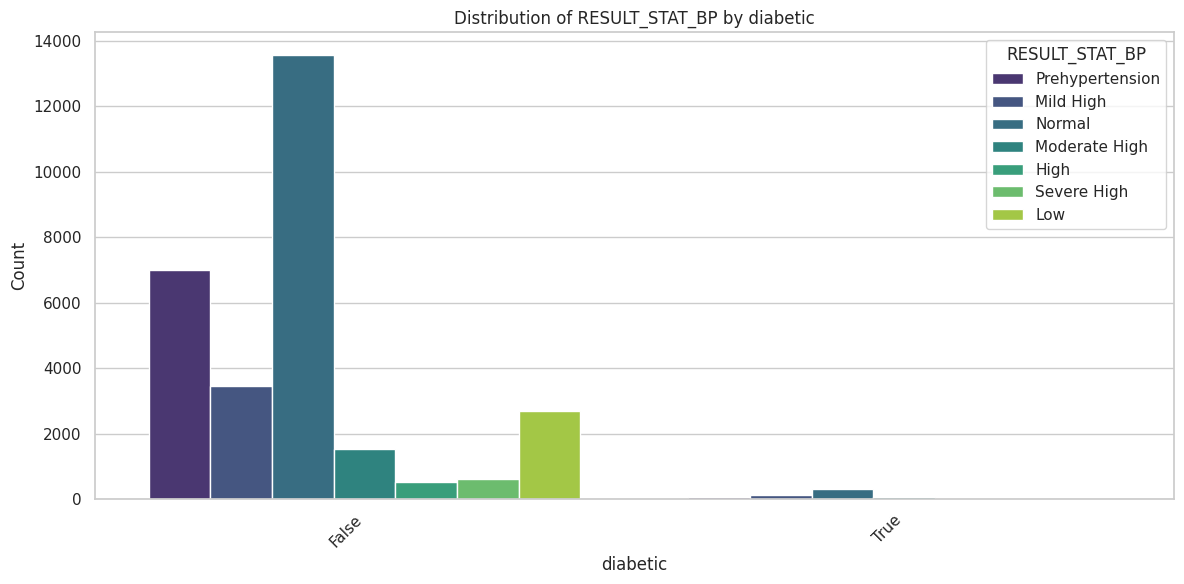

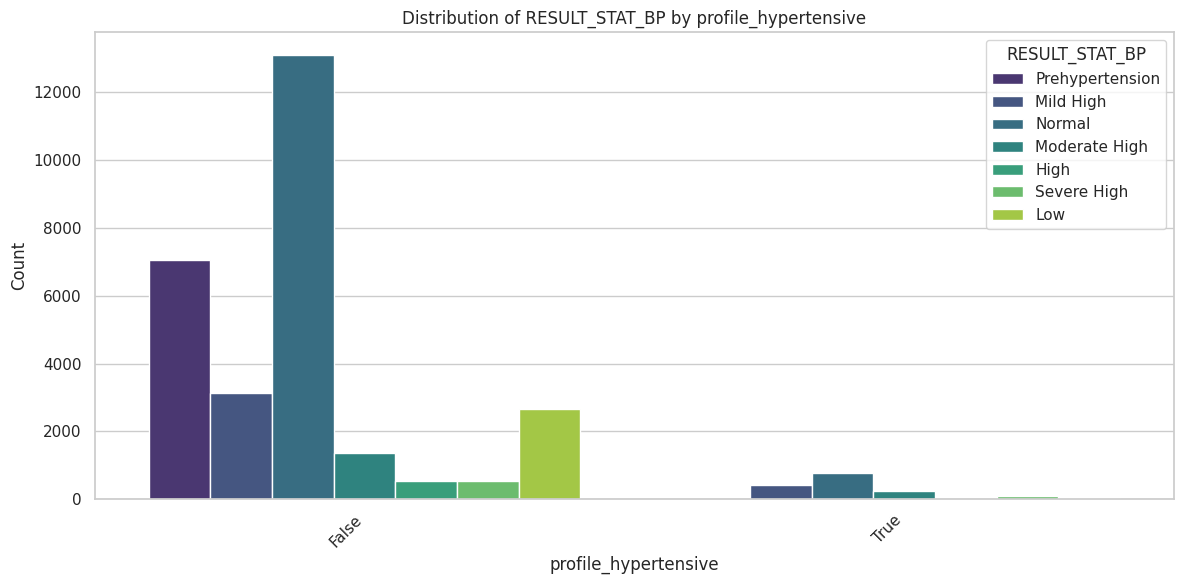

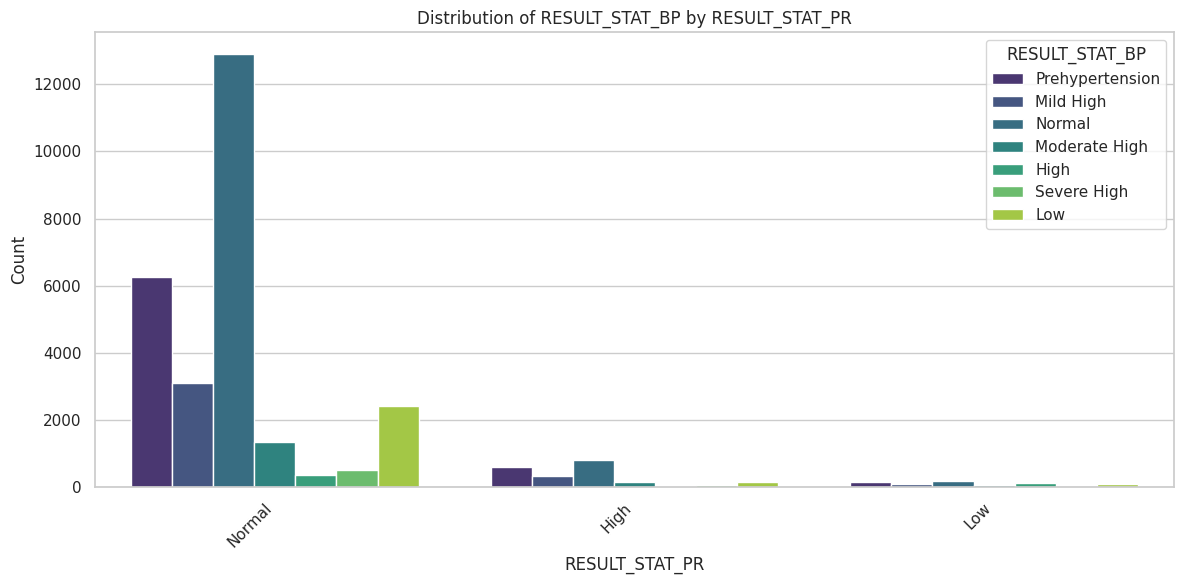

In [ ]:
# Step 8: Visualize in Bar Plots

print("\nGenerating bar plots for significant features...")

# Identify significant features again (assuming 'results' list from Chi-square tests is available)
significant_features = [r['Feature'] for r in results if r['P_Value'] < 0.05]

for feature in significant_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, hue='RESULT_STAT_BP', palette='viridis')
    plt.title(f'Distribution of RESULT_STAT_BP by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Step 9: Identify strongly associated columns
significant_features = [r['Feature'] for r in results if r['P_Value'] < 0.05]
strong_features = [r['Feature'] for r in results if r['P_Value'] < 0.001]

print("\nSummary of Significant Features (p < 0.05):")
print("=" * 50)
if significant_features:
    for feature in significant_features:
        print(f"- {feature}")
else:
    print("No features found with significant association.")

print("\nStrongly Associated Features (p < 0.001):")
print("=" * 50)
if strong_features:
    for feature in strong_features:
        print(f"- {feature}")
else:
    print("No features found with strong association (p < 0.001).")


Summary of Significant Features (p < 0.05):
- total_income
- union_name
- gender
- diabetic
- profile_hypertensive
- RESULT_STAT_PR

Strongly Associated Features (p < 0.001):
- total_income
- union_name
- gender
- diabetic
- profile_hypertensive
- RESULT_STAT_PR


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data_encoded = df.copy()
for col in ['total_income', 'gender', 'diabetic', 'profile_hypertensive', 'has_cardiovascular_disease']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded['Severe_High'] = (df['RESULT_STAT_BP'] == 'Severe High').astype(int)

# Features and target
X = data_encoded[['total_income', 'gender', 'diabetic', 'profile_hypertensive', 'has_cardiovascular_disease']]
y = data_encoded['Severe_High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test, y_test))
print("Coefficients:", dict(zip(X.columns, model.coef_[0])))

Model accuracy: 0.9775555555555555
Coefficients: {'total_income': np.float64(0.12199192165509126), 'gender': np.float64(0.4701987998344501), 'diabetic': np.float64(-0.42272327880458493), 'profile_hypertensive': np.float64(1.2204580877769826), 'has_cardiovascular_disease': np.float64(-0.19459346519522042)}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train and Evaluate Random Forest Model

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Get feature importances
print("\nFeature Importances:")
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
for feature, importance in sorted_feature_importances:
    print(f"- {feature}: {importance:.4f}")


Random Forest Model Evaluation:
Accuracy: 0.9775555555555555

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8798
           1       0.00      0.00      0.00       202

    accuracy                           0.98      9000
   macro avg       0.49      0.50      0.49      9000
weighted avg       0.96      0.98      0.97      9000


Confusion Matrix:
[[8798    0]
 [ 202    0]]

Feature Importances:
- profile_hypertensive: 0.4808
- total_income: 0.2391
- gender: 0.1922
- diabetic: 0.0740
- has_cardiovascular_disease: 0.0140


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Task 2: Statistical Significance Analysis using Chi-square Test

This section details the analysis performed to identify features statistically significant to `RESULT_STAT_BP` using the Chi-square test.

### Algorithm and Mathematical Explanation of the Chi-square Test

The Chi-square test for independence is a non-parametric statistical test used to determine if there is a significant association between two categorical variables. The null hypothesis (H₀) is that the two variables are independent, and the alternative hypothesis (H₁) is that there is a significant association between them.

**Algorithm:**

1.  **Create a Contingency Table:** Construct a table that displays the frequency distribution of the two categorical variables. The rows represent the categories of one variable, and the columns represent the categories of the other variable.
2.  **Calculate Expected Frequencies:** For each cell in the contingency table, calculate the expected frequency under the assumption of independence (H₀). The expected frequency for a cell is calculated as:

    $E_{ij} = \frac{(Row\ Total_i) \times (Column\ Total_j)}{Grand\ Total}$

    where:
    *   $E_{ij}$ is the expected frequency for the cell in row $i$ and column $j$.
    *   $Row\ Total_i$ is the sum of frequencies in row $i$.
    *   $Column\ Total_j$ is the sum of frequencies in column $j$.
    *   $Grand\ Total$ is the total number of observations.

3.  **Calculate the Chi-square Statistic:** Compute the Chi-square ($\chi^2$) statistic using the following formula:

    $\chi^2 = \sum_{i} \sum_{j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$

    where:
    *   $O_{ij}$ is the observed frequency in the cell in row $i$ and column $j$.
    *   $E_{ij}$ is the expected frequency in the cell in row $i$ and column $j$.

4.  **Determine Degrees of Freedom:** The degrees of freedom (df) for the Chi-square test of independence are calculated as:

    $df = (Number\ of\ Rows - 1) \times (Number\ of\ Columns - 1)$

5.  **Determine the P-value:** Using the calculated Chi-square statistic and degrees of freedom, find the corresponding p-value from the Chi-square distribution table or a statistical software. The p-value represents the probability of observing a Chi-square statistic as extreme as, or more extreme than, the calculated value, assuming the null hypothesis is true.

6.  **Make a Decision:** Compare the p-value to a predetermined significance level ($\alpha$, commonly 0.05).
    *   If p-value $< \alpha$, reject the null hypothesis (H₀). This indicates a statistically significant association between the two categorical variables.
    *   If p-value $\ge \alpha$, fail to reject the null hypothesis (H₀). This suggests there is no statistically significant association between the two categorical variables.

### Application in the Notebook

In this notebook, the Chi-square test was applied to each categorical feature against the `RESULT_STAT_BP` variable. The code iterates through the selected categorical columns, creates a contingency table using `pd.crosstab`, and then performs the Chi-square test using `scipy.stats.chi2_contingency`. The p-value is then used to determine the statistical significance of the association.

### Possible Analytic Outcomes

Based on the dataset and the Chi-square tests performed, here are some possible analytic outcomes and interpretations:

*   **Identification of Key Risk Factors:** Features with a statistically significant association (low p-value) with `RESULT_STAT_BP` can be considered potential risk factors or indicators related to blood pressure status. For example, if 'total_income', 'gender', and 'diabetic' show significant associations, it suggests that these demographic and health factors are not independent of blood pressure categories in this dataset.
*   **Understanding Population Subgroups at Higher Risk:** By examining the contingency tables and visualizations for the significant features, we can identify specific subgroups within the population that have a higher prevalence of certain blood pressure statuses (e.g., 'Severe High'). For instance, the analysis might reveal that individuals in lower income classes or those with diabetes have a higher proportion of elevated blood pressure readings.
*   **Informing Targeted Interventions:** The identified significant features can inform the development of targeted health interventions or screening programs. If 'union_name' is a significant factor, it might suggest that geographical location or local factors play a role in blood pressure outcomes, warranting community-specific health initiatives.
*   **Hypothesis Generation for Further Research:** The findings from the Chi-square tests can serve as a basis for generating hypotheses for more in-depth research. For example, if a strong association is found between 'profile_hypertensive' and 'Severe High' blood pressure, further studies could explore the causal relationship and underlying mechanisms.
*   **Feature Selection for Predictive Modeling:** The statistically significant features identified through the Chi-square test are strong candidates for inclusion in predictive models aimed at forecasting blood pressure outcomes. These features are likely to have predictive power and can contribute to building accurate models.

It's important to note that while the Chi-square test indicates an association, it does not imply causation. Further analysis and domain expertise are needed to understand the nature and direction of these relationships.

### Summary of Findings (Task 2)

The analysis using the Chi-square test revealed several categorical features that have a statistically significant association with `RESULT_STAT_BP`. These include total_income, union_name, gender, diabetic, profile_hypertensive, and RESULT_STAT_PR. The visualizations (heatmaps and bar plots) further illustrate these associations, showing how the distribution of blood pressure categories varies across the different levels of these features. The Chi-square test, as explained above, quantifies the difference between the observed frequencies and the expected frequencies under the assumption of independence, allowing us to determine the likelihood of such an association occurring by random chance. These findings provide valuable insights into potential factors related to blood pressure status in the dataset and can guide further investigation or intervention strategies.